In [63]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [64]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
df.price[:5]

0     39.07
1    120.00
2     62.00
3     75.00
4     51.00
Name: price, dtype: float64

In [67]:
df.shape[0]

20

In [68]:
df.price.values.reshape(len(df.price),1)

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [69]:
# df.price.values.reshape(-1,1)
# df.price.values.reshape(len(df.price),1)
# df.price.values.reshape(20,1)
df.price.values.reshape(df.shape[0],1)

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [70]:
mm_x = MinMaxScaler()
mm_y = MinMaxScaler()

x_scaled = mm_x.fit_transform(df.drop('price', axis = 'columns'))
y_scaled = mm_y.fit_transform(df.price.values.reshape(df.shape[0],1))

In [71]:
x_scaled[:5]

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ]])

In [72]:
y_scaled[:5]

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074]])

In [73]:
q = np.ones(shape=(2))

In [74]:
x_scaled.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [75]:
np.dot(q, x_scaled.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [76]:
df.shape[1]

3

In [77]:
x_scaled[:5]

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ]])

## Batch Gradient Descent

In [78]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.1):

    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    bias = 0
    total_sample = x.shape[0]


    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w, x.T) + bias #w1*area + w2*bedrooms

        w_grad = -(2/total_sample)*(x.T.dot(y_true-y_predicted))
        b_grad = -(2/total_sample)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_grad
        bias = bias - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,bias,cost, cost_list, epoch_list

In [79]:
x_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [80]:
y_scaled.shape

(20, 1)

In [81]:
y_scaled.reshape(y_scaled.shape[0],)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [82]:
w,bias,cost, cost_list, epoch_list = batch_gradient_descent(x_scaled, y_scaled.reshape(y_scaled.shape[0],), 500)

In [83]:
bias

-0.11682769564715854

In [84]:
w

array([0.75550442, 0.41573953])

In [85]:
cost

0.0034268126227234427

In [86]:
cost_list

[0.2768777174681,
 0.015142621848227952,
 0.011521234789028046,
 0.009330879304359014,
 0.007840283515760608,
 0.006820371823619059,
 0.006117481579662426,
 0.00562826367938331,
 0.005283203883426208,
 0.005035541760450724,
 0.004853818836824448,
 0.004716867331443864,
 0.004610440146799713,
 0.004524944579903571,
 0.004453918268119953,
 0.004393004276824817,
 0.004339261852527164,
 0.004290702906107087,
 0.004245980296333711,
 0.004204178196978447,
 0.0041646711138110986,
 0.004127029067815048,
 0.004090953824696992,
 0.004056236002768403,
 0.0040227262214208555,
 0.003990315691889016,
 0.0039589231580051615,
 0.003928486107418249,
 0.003898954854822059,
 0.003870288556747384,
 0.0038424525254782916,
 0.003815416416781356,
 0.003789153005427738,
 0.0037636373561593826,
 0.003738846260743099,
 0.0037147578541180054,
 0.0036913513511295988,
 0.003668606864501245,
 0.003646505277577384,
 0.0036250281540366252,
 0.0036041576725994264,
 0.0035838765786734375,
 0.0035641681475146424,
 0.003

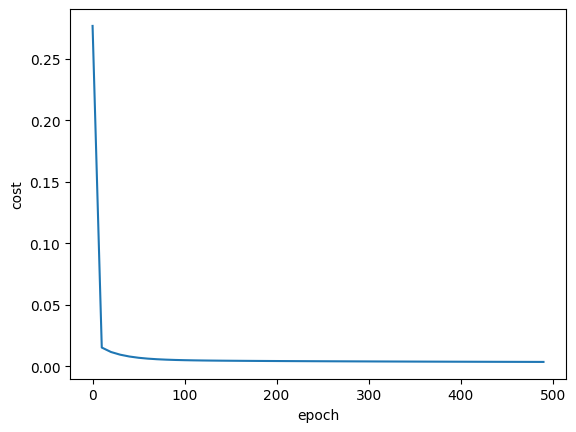

In [87]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [88]:
mm_x.transform([[2600, 4]])

C:\Users\Himel\.conda\envs\my_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [90]:
def predict(area,bedrooms,w,b):
    scaled_X = mm_x.transform([[area, bedrooms]])[0] # 2D array and i wanw to get 1D
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    predict_price = mm_y.inverse_transform([[scaled_price]])[0][0]
    return predict_price

predict(2600,4,w,bias)

C:\Users\Himel\.conda\envs\my_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


121.6279485426776

In [93]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [94]:
predict(1200,2,w,bias)

C:\Users\Himel\.conda\envs\my_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


44.32748360770947

In [95]:
predict(1056,2,w,bias)

C:\Users\Himel\.conda\envs\my_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


39.26299883295353

## Stochastic Gradient Descent

In [108]:
import random
random.randint(0,6)

3

In [110]:
def stochastic_gradient_descent(x, y_true, epochs, learning_rate = 0.1):
    number_of_feature = x.shape[1]
    bias = 0
    w = np.ones(shape=(number_of_feature))
    total_sample = x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, (total_sample -1))
        sample_x = x[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + bias

        w_gred = -(2/total_sample)*sample_x.T.dot(sample_y - y_predicted)
        b_gred = -(2/total_sample)*np.sum(sample_y - y_predicted)

        w = w - learning_rate*w_gred
        bias = bias - learning_rate*b_gred

        cost = np.mean(np.square(sample_y - y_predicted))

        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, bias, cost, cost_list, epoch_list

In [114]:
w_sgd, bias_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(x_scaled, y_scaled.reshape(y_scaled.shape[0],), 10000)

In [115]:
w_sgd

array([0.76026178, 0.41722999])

In [116]:
bias_sgd

-0.11596136796139364

In [117]:
cost_sgd

0.008879011016462383

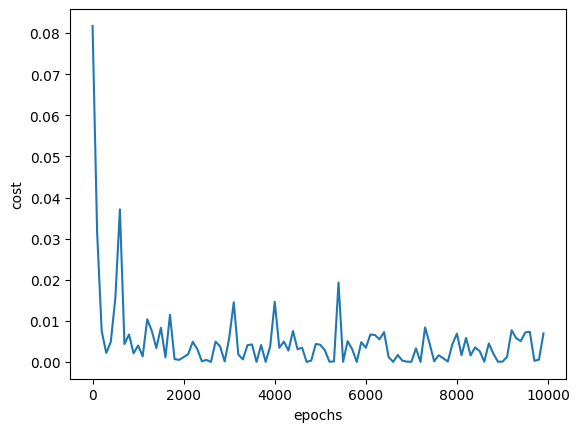

In [118]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [119]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [133]:
mm_x.transform([[1056, 2]])[0]

C:\Users\Himel\.conda\envs\my_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0.08827586, 0.25      ])

In [121]:
x_scaled[:1]

array([[0.08827586, 0.25      ]])

In [136]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [143]:
def predict_sgd(area, bedrooms, w,b):
    scaled_x = mm_x.transform([[area, bedrooms]])[0]
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    predicted_price = mm_y.inverse_transform([[scaled_price]])[0][0]
    return predicted_price

In [144]:
predict_sgd(1056, 2, w_sgd, bias_sgd)

C:\Users\Himel\.conda\envs\my_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


39.48695077884579

## Mini Batch Gradient Descent